## Introduction:

In this project, we aim to develop a classifier to predict customer churn for SyriaTel, a telecommunications company. Customer churn refers to customers who are likely to discontinue their services in the near future, posing a significant financial impact on the company. By leveraging predictive modeling techniques, we aim to identify patterns and trends within customer behavior and usage data to forecast whether a customer is at risk of churning. With a focus on binary classification, our goal is to provide SyriaTel with actionable insights to proactively address customer retention strategies and minimize revenue loss associated with churn. Through this analysis, we aim to uncover predictable patterns that can empower telecom businesses to optimize customer retention efforts and enhance overall profitability.

## Business Understanding:

![Alt text](images/churn_out.jpg)


SyriaTel, a telecommunications company, faces a significant challenge with customer churn, leading to financial losses. To tackle this, they initiate a predictive analytics project aimed at identifying customers likely to churn soon. By analyzing historical customer data like demographics, usage patterns, and service interactions, I develop a binary classifier model. This model, trained on various machine learning algorithms, predicts churn likelihood in real-time, enabling SyriaTel to proactively target at-risk customers with personalized retention strategies. Ultimately, this predictive approach helps SyriaTel optimize marketing efforts, improve customer retention, and boost overall profitability.

## Data Understanding:

![Alt text](images/exploration.jpg)


In preparing to use predictive modelling(logistics regression,random forests) for churn prediction at SyriaTel, the initial step involves collecting historical customer data encompassing demographics, usage patterns, subscription details, and service interactions. Subsequently, a thorough exploration of the dataset is conducted to understand its structure, identify relevant features, and preprocess the data to handle missing values and categorical variables. Following data splitting into training and testing sets, logistic regression and random forests is trained on the training data and evaluated using metrics like accuracy and F1 score. Through model optimization, hyperparameters are fine-tuned to enhance predictive performance, ensuring the model's robustness and interpretability. Ultimately, this approach enables SyriaTel to gain insights into customer churn drivers and implement targeted retention strategies effectively.

## Exploratory Data Analysis:

Importing the necessary libraries below

In [42]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced data visualization
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold  # For splitting data into train and test sets
from sklearn.preprocessing import StandardScaler  # For standardizing numerical features
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve, auc,roc_auc_score,make_scorer,f1_score # For model evaluation metrics
from sklearn.dummy import DummyClassifier # For creating dummy models and comparing it to our own
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning
import warnings
warnings.filterwarnings("ignore") # For filtering out annoying warnings lol
from imblearn.over_sampling import SMOTE # For fixin class imbalances
from sklearn.preprocessing import LabelEncoder # For the boolean values in the dataset
from sklearn.ensemble import RandomForestClassifier # For random forests
from sklearn.feature_selection import SelectFromModel,RFECV # For feature selection
import itertools 

Read the csv file and looked at the columns to understand which columns are being dealt with

In [43]:
df = pd.read_csv('dataset\Customer Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset has no null values but has a mixture of string and float datatypes so we need to convert the object data types to float for the regression model later on.

In [44]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Looking at all the columns that have an object data type to see how it can be converted and if theres a need to do so

In [45]:
object_columns = ['state','voice mail plan','international plan','phone number']
df.loc[:,object_columns]

,state,voice mail plan,international plan,phone number
0,KS,yes,no,382-4657
1,OH,yes,no,371-7191
2,NJ,no,no,358-1921
3,OH,no,yes,375-9999
4,OK,no,yes,330-6626
...,...,...,...,...
3328,AZ,yes,no,414-4276
3329,WV,no,no,370-3271
3330,RI,no,no,328-8230
3331,CT,no,yes,364-6381


so the internation plan and the voice mail plan are boolean so will convert to bool the state isnt really required so we can drop that column and also phone number.But before dropping state will look at how different state have different numbers of churns and see if theres a pattern somewhere and the state with the greatest number of churned customers

In [46]:
for index,data in enumerate(df['voice mail plan']):
    if data == 'yes':
        df['voice mail plan'][index] = True
    else:
        df['voice mail plan'][index] = False
df['voice mail plan'].head()


0     True
1     True
2    False
3    False
4    False
Name: voice mail plan, dtype: object

In [47]:
df['voice mail plan'] = df['voice mail plan'].astype(bool)
df['voice mail plan'].value_counts()

voice mail plan
False    2411
True      922
Name: count, dtype: int64

In [48]:
df['international plan'].value_counts()

international plan
no     3010
yes     323
Name: count, dtype: int64

In [49]:
df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

Converted the international plan to boolean true and false values as show below

In [50]:
for index,data in enumerate(df['international plan']):
    if data == 'yes':
        df['international plan'][index] = True
    else:
        df['international plan'][index] = False
df['international plan'] = df['international plan'].astype(bool)
df['international plan'].value_counts()

international plan
False    3010
True      323
Name: count, dtype: int64

In [51]:
df['state'].value_counts()


state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64

Since its significant one hot encoding could be use to create classification categories for the values in state allowing for Logistics Regression to be done.Earlier high imbalance was observed between the values in international plan and voice mail plan columns and so we would have to perform some smote operations to deal with such

One hot encoding on the state column

In [52]:
encoded_column = pd.get_dummies(df['state'],prefix='encoded',drop_first=True)
df = pd.concat([df.drop(columns='state'),encoded_column],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 70 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   phone number            3333 non-null   object 
 3   international plan      3333 non-null   bool   
 4   voice mail plan         3333 non-null   bool   
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

One hot encoded the area code column below:

In [53]:
df['area code'].value_counts()

area code
415    1655
510     840
408     838
Name: count, dtype: int64

In [54]:
encoded_area = pd.get_dummies(df['area code'],drop_first=True,prefix='encoded')
df = pd.concat([df.drop(columns='area code'),encoded_area],axis=1)
df.columns

Index(['account length', 'phone number', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn', 'encoded_AL', 'encoded_AR', 'encoded_AZ', 'encoded_CA',
       'encoded_CO', 'encoded_CT', 'encoded_DC', 'encoded_DE', 'encoded_FL',
       'encoded_GA', 'encoded_HI', 'encoded_IA', 'encoded_ID', 'encoded_IL',
       'encoded_IN', 'encoded_KS', 'encoded_KY', 'encoded_LA', 'encoded_MA',
       'encoded_MD', 'encoded_ME', 'encoded_MI', 'encoded_MN', 'encoded_MO',
       'encoded_MS', 'encoded_MT', 'encoded_NC', 'encoded_ND', 'encoded_NE',
       'encoded_NH', 'encoded_NJ', 'encoded_NM', 'encoded_NV', 'encoded_NY',
       'encoded_OH', 'encoded_OK', 'encoded_OR', 

we'll drop the phone number since its all unique

In [55]:
df.duplicated().sum()

0

In [56]:
df = df.drop(columns='phone number')

In [57]:
df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

Scaling only the continuous features ignoring the one hot encoded ones and ones with binary classification ie bool data type

In [58]:
continuous_features = ['account length', 'number vmail messages', 'total day minutes', 'total day calls',
                      'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
                      'total night minutes', 'total night calls', 'total night charge', 'total intl minutes',
                      'total intl calls', 'total intl charge', 'customer service calls']
scaler = StandardScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])
df.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03
mean,1.470971e-16,7.035077e-17,7.312216e-16,-1.934646e-16,-2.835349e-16,-6.821892e-17,3.288365e-16,1.385697e-16,7.887813e-17,-4.903235e-17,-4.370275e-17,-3.336332e-16,-8.527366e-18,2.728757e-16,8.527366e-18
std,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00
min,-2.513172e+00,-5.917599e-01,-3.301096e+00,-5.005247e+00,-3.301162e+00,-3.963622e+00,-5.025911e+00,-3.963679e+00,-3.513648e+00,-3.429870e+00,-3.515366e+00,-3.667413e+00,-1.820289e+00,-3.668210e+00,-1.188218e+00
25%,-6.797448e-01,-5.917599e-01,-6.624241e-01,-6.695701e-01,-6.623760e-01,-6.780300e-01,-6.583610e-01,-6.783123e-01,-6.698545e-01,-6.699340e-01,-6.676792e-01,-6.223690e-01,-6.011951e-01,-6.164341e-01,-4.279320e-01
50%,-1.627644e-03,-5.917599e-01,-6.887677e-03,2.812491e-02,-6.730063e-03,8.276141e-03,-5.738630e-03,8.459274e-03,6.485803e-03,-5.505089e-03,4.691242e-03,2.246393e-02,-1.948306e-01,2.045823e-02,-4.279320e-01
75%,6.513740e-01,8.695542e-01,6.725198e-01,6.759846e-01,6.726790e-01,6.768330e-01,6.970854e-01,6.766695e-01,6.808485e-01,6.589239e-01,6.814562e-01,6.672969e-01,6.178983e-01,6.706192e-01,3.323545e-01
max,3.564766e+00,3.134591e+00,3.140422e+00,3.217588e+00,3.140803e+00,3.209066e+00,3.508382e+00,3.207980e+00,3.839081e+00,3.827739e+00,3.836763e+00,3.497397e+00,6.307001e+00,3.496829e+00,5.654360e+00


## Modelling:

## Linear Regression Baseline Model:

It has a bit more columns but atleast the state was encoded correctly so the next step would be to split our data to train and test datasets using random state of 42 and a test size of 0.25

In [59]:
# we will assign the predictive features to X and the target to y
X = df.drop(columns='churn')
y = df['churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]


Now that thats successful we have created a train test split lets create a model and fit out training data using default hyperparameters


In [60]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
f1_scoree = f1_score(y_true=y_test,y_pred=y_pred)
accuracy_score = accuracy_score(y_true=y_test,y_pred=y_pred)
classification_report_baseline = classification_report(y_true=y_test,y_pred=y_pred)
print(classification_report_baseline)

              precision    recall  f1-score   support

       False       0.87      0.97      0.92       709
        True       0.56      0.19      0.29       125

    accuracy                           0.86       834
   macro avg       0.72      0.58      0.60       834
weighted avg       0.83      0.86      0.82       834



In [61]:
baseline_accuracy = 0.86
baseline_precision = 0.83
baseline_recall = 0.86
baseline_f1score = 0.82

A weighted average of 0.82 considering the class imbalance isnt that bad honestly.We have an accuracy of 0.86 but the imbalanced target makes this understandable but not the right metric to use in measuring the performance of the model.Below,created a dummy classifier model and compared it to the baseline model in the ROC curve

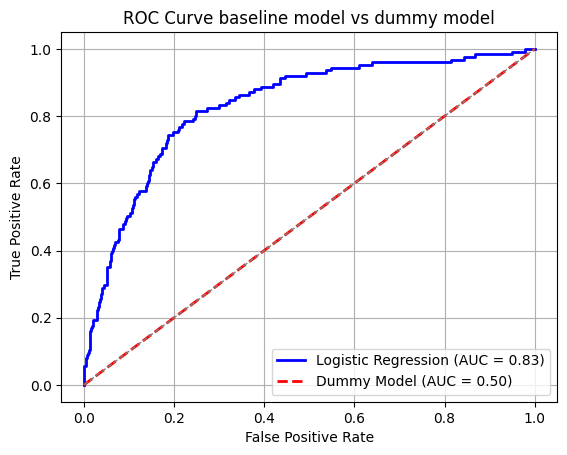

In [62]:
y_pred_prob_lr = logreg.predict_proba(X_test)[:, 1]


dummy_model = DummyClassifier(strategy='constant', constant=0)
dummy_model.fit(X_train, y_train)
y_pred_prob_dummy = dummy_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, y_pred_prob_dummy)
roc_auc_dummy = auc(fpr_dummy, tpr_dummy)
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_dummy, tpr_dummy, color='red', lw=2, linestyle='--', label='Dummy Model (AUC = %0.2f)' % roc_auc_dummy)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve baseline model vs dummy model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Linear Regression Model with Tuned Hyper Parameters:

The Logisitc Regression model with an AUC of 0.78 does a bit better as copmared to a dummy model.Now lets look at ways we could maybe improve the performance of our model to maybe increase the AUC of the model.We used grid search to find the most optimal hyperparameters for the baseline model and trained a new model with the training and testing dataset and used the hyperparameters found to determine the Weighted average F1 score as shown below


In [63]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
scorer = make_scorer(f1_score, average='weighted')
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring=scorer, verbose=1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
weighted_avg_f1 = f1_score(y_test, y_pred, average='weighted')
print("Weighted Average F1 Score:", weighted_avg_f1,'\n','Difference Average F1 Score:', weighted_avg_f1-baseline_f1score)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Best Hyperparameters: {'C': 100, 'penalty': 'l2'}
Weighted Average F1 Score: 0.8303224801270839 
 Difference Average F1 Score: 0.010322480127083922


So the weighted average F1 score has increase by a small percentage of about 1% increase in the f1 score.Below we create a dummy model and log reg model with the optimal hyper parameters found and train it and compare both the models in a ROC curve to see which performs better after

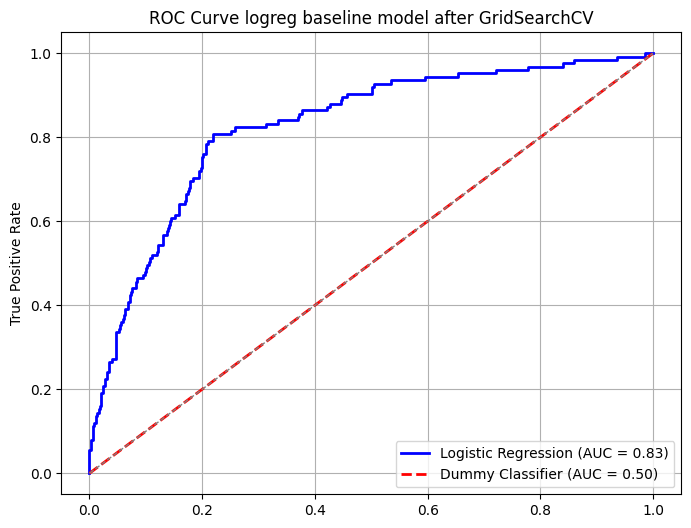

In [64]:
logreg = LogisticRegression(**best_params)
dummy = DummyClassifier(strategy='constant',constant=0)

logreg.fit(X_train,y_train)
dummy.fit(X_train, y_train)

y_pred_prob_logreg = logreg.predict_proba(X_test)[:, 1]
y_pred_prob_dummy = dummy.predict_proba(X_test)[:, 1]

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_dummy, tpr_dummy, _ = roc_curve(y_test, y_pred_prob_dummy)
roc_auc_dummy = auc(fpr_dummy, tpr_dummy)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_dummy, tpr_dummy, color='red', lw=2, linestyle='--', label='Dummy Classifier (AUC = %0.2f)' % roc_auc_dummy)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve logreg baseline model after GridSearchCV')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Decided to try and deal with the class imbalance using smote to see if it might improve the performance of the model all together.First converted the boolean columns to int booleans(1,0) using LabelEncoder and then dealt with the class imbalance in the columns['churn','international plan','voice mail plan'] using smote with random state of 42 and resampled the target variabley and X features

Lets try and use smote for the class imbalance to see if maybe theres an improvement in the model

In [65]:
bool_columns = X.select_dtypes(include='bool').columns

label_encoder = LabelEncoder()
for col in bool_columns:
    X[col] = label_encoder.fit_transform(X[col])


X_imbalanced = X[['international plan', 'voice mail plan']]
y_imbalanced = y

smote_features = SMOTE(sampling_strategy='auto', random_state=42)


X_resampled_imbalanced, y_resampled_imbalanced = smote_features.fit_resample(X_imbalanced, y_imbalanced)

X_resampled_features = pd.concat([X.drop(['international plan', 'voice mail plan'], axis=1), X_resampled_imbalanced], axis=1)

smote_target = SMOTE(sampling_strategy='auto', random_state=42)

X_resampled_target, y_resampled_target = smote_target.fit_resample(X, y)

X_resampled_target = pd.DataFrame(X_resampled_target, columns=X.columns)
y_resampled_target = pd.Series(y_resampled_target, name=y.name)

In [66]:
X_resampled_target.shape

(5700, 69)

In [67]:
y_resampled_target.shape

(5700,)

Did a train test split with the new data and then did a grid search for the best hyper parameters that would give the most optimal f1 score as shown below

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled_target,y_resampled_target,test_size=0.25,random_state=42)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
scorer = make_scorer(f1_score, average='weighted')
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring=scorer, verbose=1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
weighted_avg_f1 = f1_score(y_test, y_pred, average='weighted')
print("Weighted Average F1 Score:", weighted_avg_f1,'\n','Difference with baseline model:',weighted_avg_f1 - baseline_f1score)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Weighted Average F1 Score: 0.9022991351651951 
 Difference with baseline model: 0.08229913516519516


Define and get scorer:

In [69]:
def weighted_f1(y_true, y_pred):
    return f1_score(y_true, y_pred, average='weighted')

weighted_f1_scorer = make_scorer(weighted_f1)

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.89      0.93      0.91       738
        True       0.92      0.87      0.90       687

    accuracy                           0.90      1425
   macro avg       0.90      0.90      0.90      1425
weighted avg       0.90      0.90      0.90      1425



The weighted Average f1 score is 0.904 which is an improvement compared to our baseline mode and its by about 8%, a small amount but an improvement nonetheless

Using the best hyper parameters found by grid search I fit the models and computed the predicted probabilites for logistic regression and dummy classifier.Then computed the roc curve and area for dummy classifier and log regression and then plotted the curve

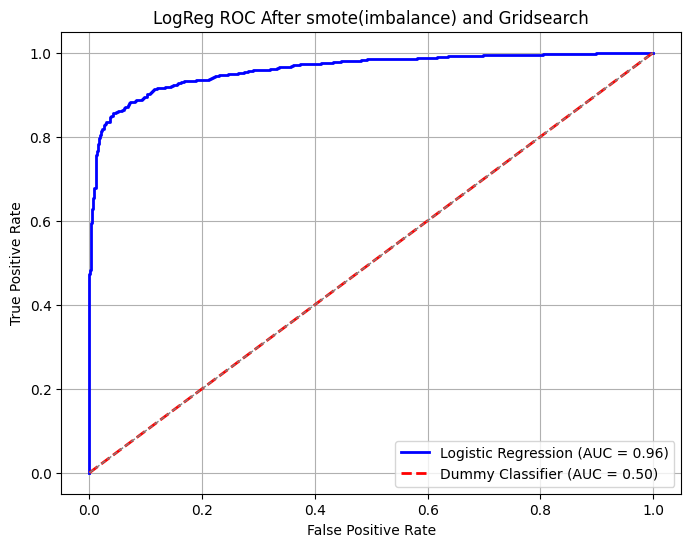

In [71]:
logreg = LogisticRegression(**best_params)
dummy = DummyClassifier(strategy='constant',constant=0)
logreg.fit(X_train,y_train)
dummy.fit(X_train, y_train)
y_pred_prob_logreg = logreg.predict_proba(X_test)[:, 1]
y_pred_prob_dummy = dummy.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, y_pred_prob_dummy)
roc_auc_dummy = auc(fpr_dummy, tpr_dummy)
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_dummy, tpr_dummy, color='red', lw=2, linestyle='--', label='Dummy Classifier (AUC = %0.2f)' % roc_auc_dummy)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogReg ROC After smote(imbalance) and Gridsearch')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


The AUC of our model has increased a significant amount from our baseline model having 0.83 AUC to the new model having AUC of 0.96 this shows that the performance of our model in prediction is pretty decent.Below we will look at the confusion Matrix

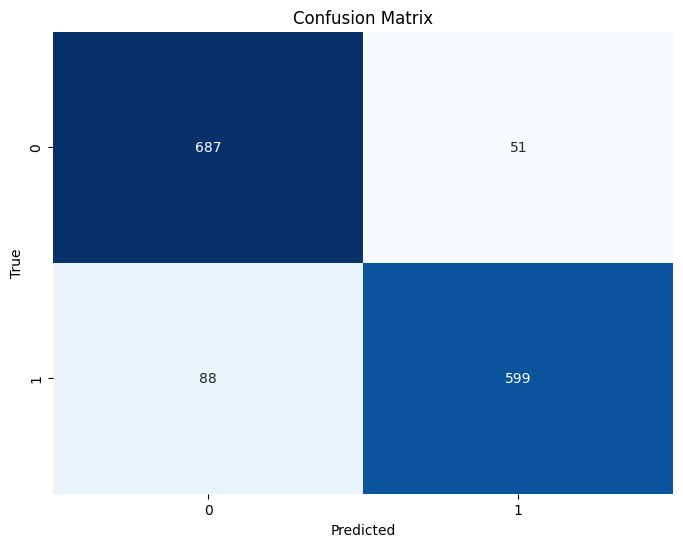

In [72]:
y_pred_con = logreg.predict(X_test)
cm = confusion_matrix(y_true=y_test,y_pred=y_pred_con)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show();

As shown above in the Confusion Matrix we have:



True Negative Values = 697

True Positive Values = 599

False Positive Values = 51

False Negative Values = 88


This goes to show that our model struggles slightly with making the correct choice when choosing the negative values in that it is likely to choose a value as negative when its actually positive which isnt bad since our main aim is to build a prediction model that can tell us whether a customer is going to churn or not.

Looking into the classification report below to get a feel of the values for the accuracy,precision,recall and f1 weighted averages and comparing it to the baseline model first made.

In [73]:
final_classification_report = classification_report(y_test,y_pred_con)
print(f'BASELINE MODEL: \n\n\n {classification_report_baseline}','---------------------------------------------------------------------------',f'OPTIMIZED MODEL: \n\n\n {final_classification_report}',sep='\n'*3)

BASELINE MODEL: 


               precision    recall  f1-score   support

       False       0.87      0.97      0.92       709
        True       0.56      0.19      0.29       125

    accuracy                           0.86       834
   macro avg       0.72      0.58      0.60       834
weighted avg       0.83      0.86      0.82       834



---------------------------------------------------------------------------


OPTIMIZED MODEL: 


               precision    recall  f1-score   support

       False       0.89      0.93      0.91       738
        True       0.92      0.87      0.90       687

    accuracy                           0.90      1425
   macro avg       0.90      0.90      0.90      1425
weighted avg       0.90      0.90      0.90      1425



Comparing the new model to the baseline model we have:

Improved weighted average accuracy from 0.86 to 0.90 a 4% increase!

Improved weighted average precision from 0.83 to 0.90 a 7% increase!

Improved weighted average recall from 0.86 to 0.90 a 4% increase!

Improved weighted average F1 Score from 0.82 to 0.90 an 8% increase!


This shows that the optimization of our baseline model was successful.

Below we validate the model obtained on a testing dataset through cross validation

In [74]:
k_folds = 5
cv_strategy = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

cv_scores = cross_val_score(logreg, X_resampled_target, y_resampled_target, cv=cv_strategy, scoring=weighted_f1_scorer)

mean_f1 = cv_scores.mean()
std_f1 = cv_scores.std()
print(cv_scores)
print("Cross-Validation F1-Score: {:.2f} +/- {:.2f}".format(mean_f1, std_f1))

[0.90255953 0.89717846 0.90957335 0.89899216 0.89629173]
Cross-Validation F1-Score: 0.90 +/- 0.00


The F1 score was found to be 90% similar to what was seen in the classification report.Below we would build a plot confusion matrix function and look at the top features of the model along with the precision,accuracy and F1 scores as a short summary of our model above(I had previously assigned some variable names simialr to the modules so we'll be importing them again this time lol):

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_preddd = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_preddd)
precision = precision_score(y_test, y_preddd)
recall = recall_score(y_test, y_preddd)
f1 = f1_score(y_test, y_preddd)
conf_matrix = confusion_matrix(y_test, y_preddd)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


coefficients = logreg.coef_[0]
feature_names = X_resampled_target.columns

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

print("Top features driving customer attrition:")
print(coefficients_df.head(10))


Accuracy: 0.9024561403508772
Precision: 0.9215384615384615
Recall: 0.8719068413391557
F1-score: 0.8960359012715033
Top features driving customer attrition:
       Feature  Coefficient  Abs_Coefficient
30  encoded_IL    -6.229875         6.229875
27  encoded_HI    -6.010905         6.010905
19  encoded_AZ    -5.844142         5.844142
64  encoded_WI    -5.618125         5.618125
61  encoded_VA    -5.599387         5.599387
44  encoded_ND    -5.506047         5.506047
48  encoded_NM    -5.478078         5.478078
62  encoded_VT    -5.442791         5.442791
55  encoded_RI    -5.432990         5.432990
51  encoded_OH    -5.428567         5.428567


## Random Forest Model:

Assigning X features and y targets then performing smote to deal with class imbalance on the international plan and voice mail plans and then train.I did a train test split after and instantiated the random forest classifier and looked at the classification report

In [76]:
# we will assign the predictive features to X and the target to y
X = df.drop(columns='churn')
y = df['churn']
bool_columns = X.select_dtypes(include='bool').columns

label_encoder = LabelEncoder()
for col in bool_columns:
    X[col] = label_encoder.fit_transform(X[col])


X_imbalanced = X[['international plan', 'voice mail plan']]
y_imbalanced = y

smote_features = SMOTE(sampling_strategy='auto', random_state=42)


X_resampled_imbalanced, y_resampled_imbalanced = smote_features.fit_resample(X_imbalanced, y_imbalanced)

X_resampled_features = pd.concat([X.drop(['international plan', 'voice mail plan'], axis=1), X_resampled_imbalanced], axis=1)

smote_target = SMOTE(sampling_strategy='auto', random_state=42)

X_resampled_target, y_resampled_target = smote_target.fit_resample(X, y)

X = pd.DataFrame(X_resampled_target, columns=X.columns)
y = pd.Series(y_resampled_target, name=y.name)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

classification_rf = classification_report(y_true=y_test,y_pred=y_pred)
print(classification_rf)

# Cross Validation of F1 Score
k_folds = 5
cv_strategy = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=cv_strategy, scoring=weighted_f1_scorer)
print("Cross-Validation Weighted F1-scores:", cv_scores)
mean_f1_score = np.mean(cv_scores)
std_f1_score = np.std(cv_scores)
print("Mean Cross-Validation Weighted F1-score: {:.2f}".format(mean_f1_score))
print("Standard Deviation of Cross-Validation Weighted F1-scores: {:.2f}".format(std_f1_score))


              precision    recall  f1-score   support

       False       0.94      0.96      0.95       738
        True       0.95      0.94      0.94       687

    accuracy                           0.95      1425
   macro avg       0.95      0.95      0.95      1425
weighted avg       0.95      0.95      0.95      1425

Cross-Validation Weighted F1-scores: [0.93333133 0.92629664 0.9497076  0.9497076  0.94619294]
Mean Cross-Validation Weighted F1-score: 0.94
Standard Deviation of Cross-Validation Weighted F1-scores: 0.01


In conclusion, the Random Forest model exhibits strong predictive performance for identifying customer churn likelihood. With a high overall F1 score of 95%, it effectively distinguishes between churn and non-churn cases. However, it's important to note that while precision for non-churn cases is excellent at 95%, there is room for improvement in recall for churn cases, indicating a potential for further fine-tuning to capture more instances of actual churn. Nonetheless, the model demonstrates promising potential for aiding in customer retention strategies and optimizing business decisions.

## Random Forest Model with Tuned Hyper Parameters:

Defining our f1 scorer:

In [77]:
weighted_f1_scorer = make_scorer(weighted_f1)

Lets try and optimize it by doing a gridsearchCV and look at the classficication report of the predictions to get a feel of the performance of the model

In [38]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring=weighted_f1_scorer)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_rf_model = grid_search.best_estimator_
y_pred_grid_search = best_rf_model.predict(X_test)
classification_rf_grid_search = classification_report(y_true=y_test, y_pred=y_pred_grid_search)
print("Classification Report (Grid Search):")
print(classification_rf_grid_search)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report (Grid Search):
              precision    recall  f1-score   support

       False       0.94      0.96      0.95       738
        True       0.96      0.93      0.94       687

    accuracy                           0.95      1425
   macro avg       0.95      0.95      0.95      1425
weighted avg       0.95      0.95      0.95      1425



After conducting grid search, the best parameters for the Random Forest model were determined to be:


min samples leaf: 1 


min samples split: 2


n_estimators: 200 



The model's overall performance for determining churn rate appears strong, with an accuracy of 95%. It shows high precision and recall for both classes (False and True churn), indicating balanced performance across predicting both churn and non-churn instances. The F1-score, which considers both precision and recall, is also high for both classes, further validating the model's effectiveness.

Looking at the ROC Curve:

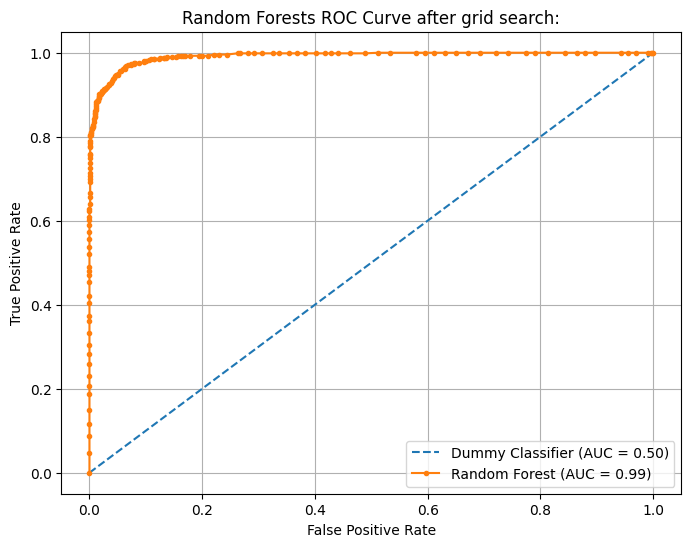

In [39]:
rf_probs = best_rf_model.predict_proba(X_test)[:, 1]
dummy_classifier = DummyClassifier(strategy="constant", constant=0)
dummy_classifier.fit(X_train, y_train)
dummy_probs = dummy_classifier.predict_proba(X_test)[:, 1]
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, dummy_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
auc_dummy = roc_auc_score(y_test, dummy_probs)
auc_rf = roc_auc_score(y_test, rf_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dummy, tpr_dummy, linestyle='--', label='Dummy Classifier (AUC = {:.2f})'.format(auc_dummy))
plt.plot(fpr_rf, tpr_rf, marker='.', label='Random Forest (AUC = {:.2f})'.format(auc_rf))
plt.title('Random Forests ROC Curve after grid search:')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


Doing feature selection to pick the most important features to the model and a grid search after.Would also check out the ROC curve of the new model and its classification report

Best Parameters after Grid Search: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


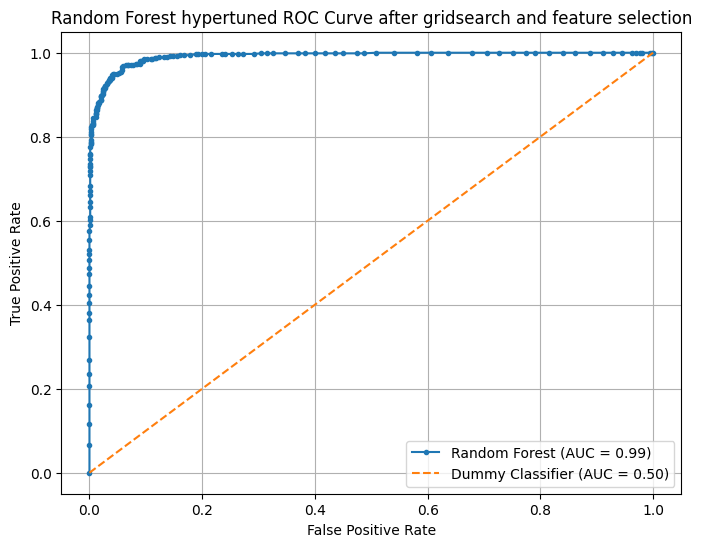

Top 10 Selected Features:
1. account length
2. international plan
3. voice mail plan
4. number vmail messages
5. total day minutes
6. total day calls
7. total day charge
8. total eve minutes
9. total eve calls
10. total eve charge
Cross-Validation Weighted F1-scores: [0.93917197 0.92981784 0.95438222 0.9462006  0.94853505]
Mean Cross-Validation Weighted F1-score: 0.94
Standard Deviation of Cross-Validation Weighted F1-scores: 0.01
Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.96      0.95       738
        True       0.96      0.94      0.95       687

    accuracy                           0.95      1425
   macro avg       0.95      0.95      0.95      1425
weighted avg       0.95      0.95      0.95      1425



In [40]:
rf_classifier = RandomForestClassifier(random_state=42)
rfecv = RFECV(estimator=rf_classifier, cv=5, scoring=weighted_f1_scorer)
rfecv.fit(X_train, y_train)

# Selecting the features that are like useful based off of RFCEV 
X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring=weighted_f1_scorer)
grid_search.fit(X_train_selected, y_train)
best_params = grid_search.best_params_
print("Best Parameters after Grid Search:", best_params)

# Optimal model parameter,fitting,predicting probabilities
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train_selected, y_train)
rf_probs = best_rf_model.predict_proba(X_test_selected)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
auc_rf = roc_auc_score(y_test, rf_probs)

# Plotting the roc curve,cross-validation and classification report
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, marker='.', label='Random Forest (AUC = {:.2f})'.format(auc_rf))
plt.plot(fpr_dummy, tpr_dummy, linestyle='--', label='Dummy Classifier (AUC = {:.2f})'.format(auc_dummy))
plt.title('Random Forest hypertuned ROC Curve after gridsearch and feature selection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# Printing the top 10 features used:
selected_feature_indices = rfecv.support_
selected_feature_names = X.columns[selected_feature_indices]
print("Top 10 Selected Features:")
for i, feature in enumerate(selected_feature_names[:10], start=1):
    print("{}. {}".format(i, feature))

#Cross Validation
cv_scores = cross_val_score(best_rf_model, X_train_selected, y_train, cv=cv_strategy, scoring=weighted_f1_scorer)
print("Cross-Validation Weighted F1-scores:", cv_scores)
mean_f1_score = np.mean(cv_scores)
std_f1_score = np.std(cv_scores)
print("Mean Cross-Validation Weighted F1-score: {:.2f}".format(mean_f1_score))
print("Standard Deviation of Cross-Validation Weighted F1-scores: {:.2f}".format(std_f1_score))

# Classification report
y_pred = best_rf_model.predict(X_test_selected)
classification_report_rf = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report_rf)


Showing the baseline and logistics regression models classification reports

In [41]:
print(f'BASELINE LOGREG MODEL: \n\n\n {classification_report_baseline}','---------------------------------------------------------------------------',f'OPTIMIZED LOGREG MODEL: \n\n\n {final_classification_report}',sep='\n'*3)

BASELINE LOGREG MODEL: 


               precision    recall  f1-score   support

       False       0.87      0.97      0.92       709
        True       0.56      0.19      0.29       125

    accuracy                           0.86       834
   macro avg       0.72      0.58      0.60       834
weighted avg       0.83      0.86      0.82       834



---------------------------------------------------------------------------


OPTIMIZED LOGREG MODEL: 


               precision    recall  f1-score   support

       False       0.89      0.93      0.91       738
        True       0.92      0.87      0.90       687

    accuracy                           0.90      1425
   macro avg       0.90      0.90      0.90      1425
weighted avg       0.90      0.90      0.90      1425



Confusion Matrix For the random Forest optimized model:

Confusion matrix, without normalization


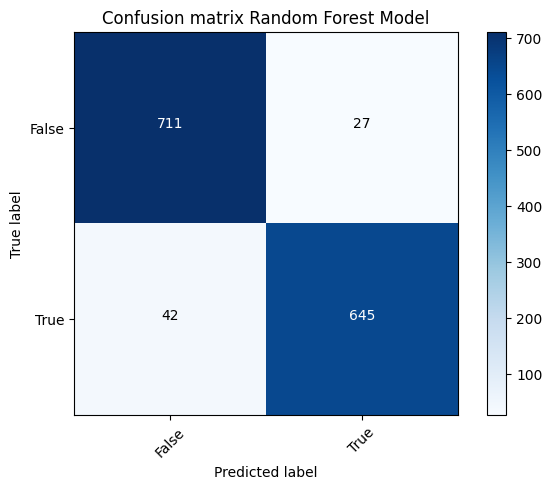

In [163]:
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm=cm,classes=['False', 'True'],normalize=False,
                      title='Confusion matrix Random Forest Model')

Based on the observed values, it is evident that the model demonstrates a strong ability to correctly identify true negatives, with 711 instances accurately classified. However, it also indicates a relatively low number of false positives, with 27 instances incorrectly classified. Additionally, the model successfully identifies 645 true positive cases, indicating its effectiveness in identifying customers at risk of churn. Nevertheless, there are 42 instances where the model incorrectly predicts a negative outcome for customers who actually churned. This analysis underscores the model's overall effectiveness in predicting customer churn, while also highlighting areas for potential improvement, particularly in reducing false negatives to further enhance predictive accuracy.

# Evaluation:


The F1 score was selected as a crucial evaluation metric due to its ability to strike a balance between recall and precision, which is essential in predicting customer churn. By taking the harmonic mean of precision and recall, the F1 score provides a comprehensive assessment of the model's ability to correctly identify churners while minimizing false positives. This balance is particularly important in churn prediction, where accurately identifying customers at risk of leaving while avoiding unnecessary interventions is paramount. By optimizing the F1 score, the chosen model achieves an equilibrium between capturing true positives and mitigating false positives, thereby enhancing its effectiveness in real-world scenarios where both precision and recall are essential considerations.

Based on the comprehensive evaluation conducted, it is evident that the optimized random forest model emerges as the most suitable choice for predicting customer churn among the considered models, including the baseline logistic regression model, optimized logistic regression model, and random forest baseline model.

The evaluation highlights several key factors that contribute to the superiority of the optimized random forest model. Firstly, its robust feature selection process identifies crucial variables such as account length, international plan status, and voicemail usage, which are instrumental in understanding customer behavior and predicting churn. By leveraging these top 10 selected features, the model gains valuable insights into the drivers of churn, allowing SyriaTel to tailor retention strategies effectively.

Moreover, the performance metrics of the optimized random forest model demonstrate its effectiveness in churn prediction. With a weighted average precision, recall, and accuracy of 95%, along with an impressive F1 score of 95%, the model exhibits high predictive power and reliability. This is a significant improvement compared to the logistic regression models, which show weighted average metrics of 90%, indicating a notable 5% increase in performance across all metrics.

Furthermore, the analysis of the ROC curve underscores the superiority of the optimized random forest model in terms of discriminative ability. The area under the curve (AUC) for the optimized random forest model is calculated at 99%, significantly higher than the AUC of 96% observed for the logistic regression model. This substantial difference of 3% further solidifies the superiority of the optimized random forest model in effectively distinguishing between churners and non-churners.

In summary, the comprehensive evaluation of model performance metrics, feature selection, and discriminative ability unequivocally supports the selection of the optimized random forest model as the final choice for predicting customer churn. By deploying this model, SyriaTel can proactively address churn risk and implement targeted retention strategies, ultimately leading to improved customer satisfaction and loyalty.

## Conclusions:

So from the 4 models:Baseline logistics reg model,optimized log reg model,random forest model,optimized random forest model and by optimized it means the hyper parameter tuning was done on the model we found that from the classification scores that the optimized random forest model was the most optimal model to use in prediction of customer churn.The optimized random forests have the following as the top 10 features that were used in model prediction:



Top 10 Selected Features:
1. account length
2. international plan
3. voice mail plan
4. number vmail messages
5. total day minutes
6. total day calls
7. total day charge
8. total eve minutes
9. total eve calls
10. total eve charge


The optimized random forest model has the weighted average precision,recall and accuracy being 95% with the F1 score being 95%. Comparing it to the logistics regression model which has all the weighted average metrics as 90%(F1 score,precision,recall and accuracy) theres a 5% increase in the models performance based off of these metrics.Moreover based off of the ROC curve we find that the auc of the optimized random forest model was 99% while the auc of the logistics regression model was a bit lower with 96% a difference of 3% this further solidified my choice of picking the Optimized Random Forest Model as the final model.


## Recommendations:

![Alt text](images/stop_churnin.jpg)

Based on our findings, I recommend deploying the optimized random forest model for predicting customer churn due to its superior performance metrics and robust feature selection. By leveraging features such as account length, international plan status, and voicemail usage, this model provides valuable insights into customer behavior. Its high precision, recall, accuracy, and F1 score, along with a strong AUC, make it a reliable tool for identifying potential churners. Incorporating this model into decision-making processes can help businesses proactively address customer retention strategies and ultimately improve overall customer satisfaction and loyalty.